(lecture12:fitting-normals-to-data)=
# Fitting Normal distributions to data

Let's say that you have $N$ data points:

$$
x_{1:N} = (x_1,\dots,x_N),
$$

and you want to fit a Normal distribution to them.
So, you want to find a mean $\mu$ and a variance $\sigma^2$ so that the data can be thought of as samples from
a Normal random variable:

$$
X \sim N(\mu, \sigma^2).
$$

This is our very first *model training* problem.
Our model, is that $X$ follows a Normal with unknown mean parametr $\mu$ and unknown variance parameter $\sigma^2$ and we want to use the data $x_{1:N}$ to find these parameters.
This is what we do in data science every day. We train models like this!
Sometimes instead of saying "train a model with" we say that we "fit the model parameters to data".
So, "model training" and "parameter fitting" are the same thing.

## The method of moments
Okay, how do we fit the parameters?
I will show you the simplest possible method.
It is called [the method of moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)).
First, what is a *moment* of a random variable $X$?
Well, a moment is this expectation:

$$
\mathbf{E}[X^\rho] = \int x^\rho p(x)dx,
$$

for any $\rho=1,2,\dots,$.
So, the *first moment* ($\rho=1$) is just the mean:

$$
\mathbf{E}[X] = \mu,
$$

and the second moment ($\rho=2$) is:

$$
\mathbf{E}[X^2] = \mathbf{V}[X] + \left(\mathbf{E}[X]\right)^2 = \sigma^2 + \mu^2,
$$

where I used the formula $\mathbf{V}[X] = \mathbf{E}[X^2] - \left(\mathbf{E}[X]\right)^2$.

The method of moments, says that you should pick the parameters of a distribution so that the theoretical moments match the empirical moments.
Speicifically, the first moment should match the empirical average, i.e.,

$$
\mathbf{E}[X] = \frac{1}{N}\sum_{i=1}^Nx_i,
$$

the second moment should match:

$$
\mathbf{E}[X^2] = \frac{1}{N}\sum_{i=1}^Nx_i^2,
$$

and so on and so forth.

For the Normal in particular, we have from matching the first moment that we should pick $\mu$ to be:

$$
\hat{\mu} = \frac{1}{N}\sum_{i=1}^Nx_i.
$$

Note that $\hat{\mu}$ is our estimate of $\mu$. That's what the hat indicates.

Similarly, matching the second moment yields:

$$
\hat{\sigma}^2 + \hat{\mu}^2 = \frac{1}{N}\sum_{i=1}^Nx_i^2,
$$

which we can solve for $\hat{\sigma}^2$ (our estimate of the variance):

$$
\hat{\sigma}^2 = \frac{1}{N}\sum_{i=1}^Nx_i^2 - \hat{\mu}^2.
$$

Okay, let's try it out in an example.

## Example: Fitting a Normal to the selected temperature setpoints

Let’s load our high-performance building dataset:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)
   
# The url of the file we want to download
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/temperature_raw.xlsx'
download(url)
import numpy as np
import pandas as pd
df = pd.read_excel('temperature_raw.xlsx')
df = df.dropna(axis=0)
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [2]:
df.head()

,household,date,score,t_out,t_unit,hvac
0,a1,2018-01-07,100.0,4.283373,66.693229,246.473231
1,a10,2018-01-07,100.0,4.283373,66.356134,5.492116
2,a11,2018-01-07,58.0,4.283373,71.549132,402.094327
3,a12,2018-01-07,64.0,4.283373,73.429514,211.692244
4,a13,2018-01-07,100.0,4.283373,63.923937,0.850536


We are going to pick data from a specific unit, say `a1` and we are going to fit a Normal to the selected temperature setpoint `t_unit`.
Select all relevant data:

In [16]:
t_unit_a1 = df[df['household'] == 'a1']['t_unit']
t_unit_a1

0       66.693229
50      67.812649
100     66.512783
150     69.575546
200     70.085743
          ...    
4700    73.619056
4750    72.456811
4800    72.450988
4850    71.451835
4900    70.896187
Name: t_unit, Length: 82, dtype: float64

Let's do the histogram of the data just to get an idea of how they look like:

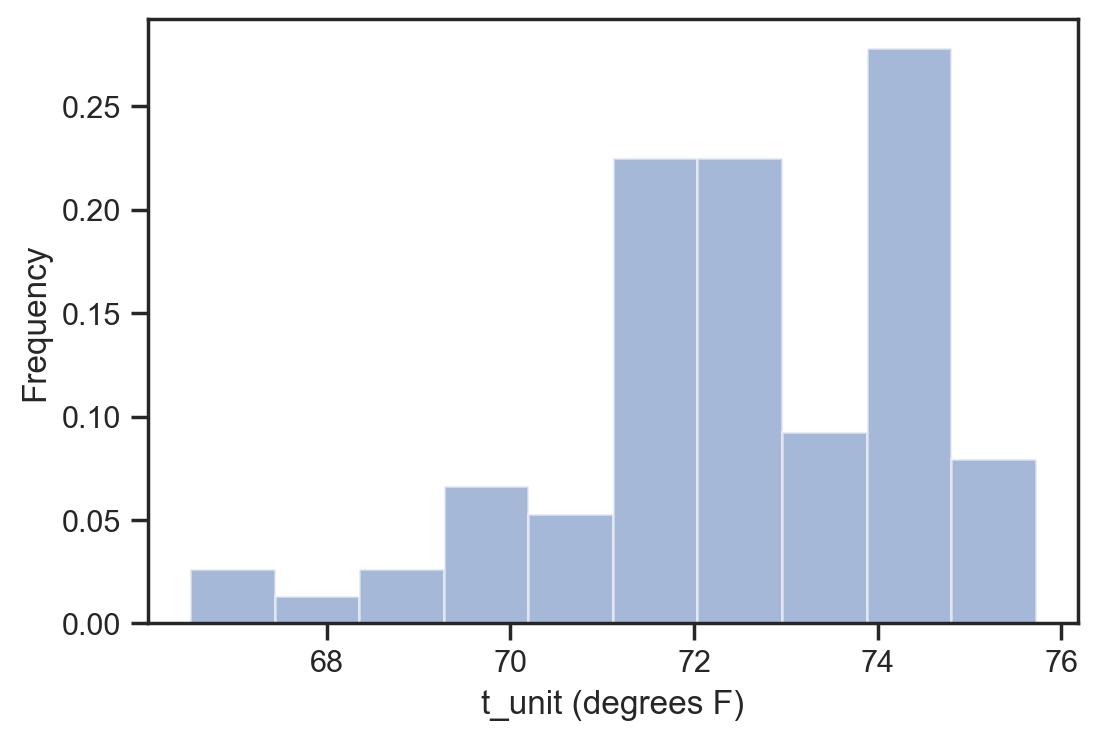

In [17]:
fig, ax = plt.subplots()
ax.hist(t_unit_a1, density=True, alpha=0.5)
ax.set_xlabel('t_unit (degrees F)')
ax.set_ylabel('Frequency');

This doesn't look perfectly Normal, but it's okay.
We will fit it anyway!

Using the method of moments, let's pick the mean:

In [20]:
mu = t_unit_a1.mean()
print('mu = {0:1.2f}'.format(mu))

mu = 72.49


and also the variance:

In [21]:
sigma2 = np.mean(t_unit_a1 ** 2) - mu ** 2
print('sigma2 = {0:1.2f}'.format(sigma2))

sigma2 = 3.75


Now let's make such a random variable:

In [24]:
import scipy.stats as st
sigma = np.sqrt(sigma2)
T_unit_a1 = st.norm(loc=mu, scale=np.sqrt(sigma))

Alright, that's it!

Let's compare the PDF of the newly constructed random variable to the histogram:

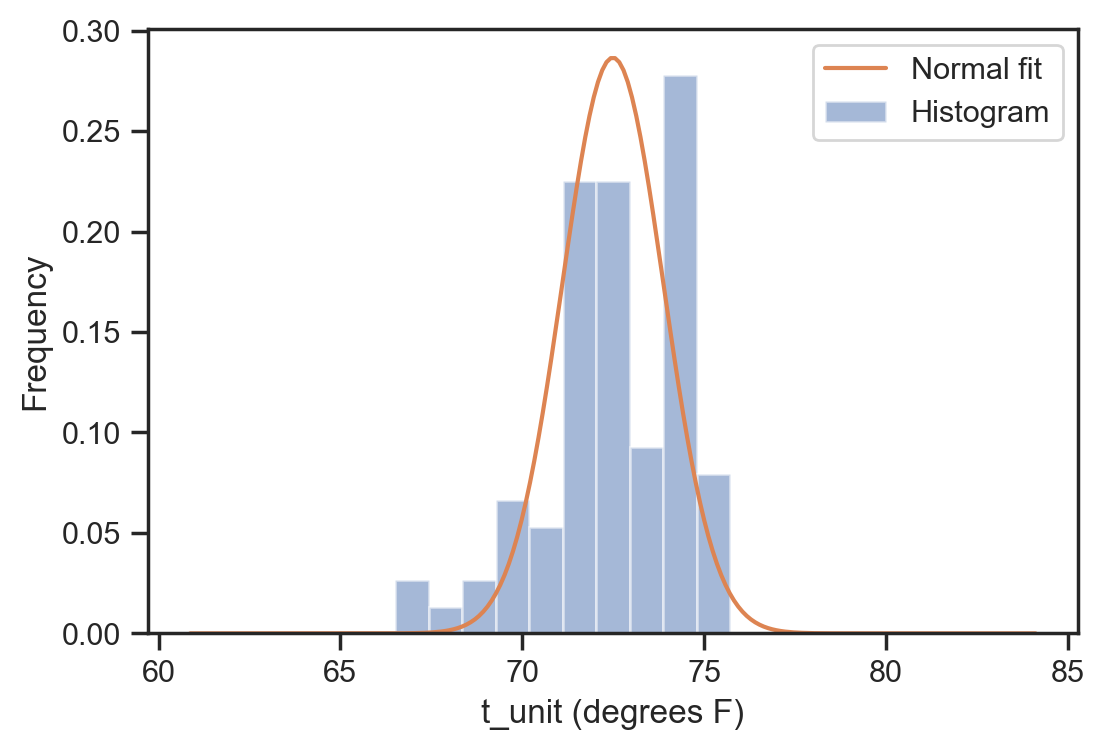

In [25]:
fig, ax = plt.subplots()
ax.hist(t_unit_a1, density=True, alpha=0.5, label='Histogram')
ts = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 200)
ax.plot(ts, T_unit_a1.pdf(ts), label='Normal fit')
ax.set_xlabel('t_unit (degrees F)')
ax.set_ylabel('Frequency')
plt.legend(loc='best');

Okay, not perfect - but not bad either.
When you are doing data science you should be able to accept some error in your model.
There is no such thing as a perfect model.
Here we have managed to summarize the situation with two numbers (mean and variance) which is pretty impressive.

Now that you have fitted a Normal distribution to the data you can ask all shorts of questions.
Like:

+ What is the 0.025 quantile?
+ What is the 0.975 quantile?
+ What is the probability that the unit temperature exceeds 72 degrees F?

Here are the answers to these questions (respectively):

In [30]:
q025 = T_unit_a1.ppf(0.025)
print('0.025-quantile = {0:1.2f}'.format(q025))

0.025-quantile = 69.77


In [31]:
q975 = T_unit_a1.ppf(0.975)
print('0.975-quantile = {0:1.2f}'.format(q975))

0.975-quantile = 75.22


In [32]:
pgt72 = 1 - T_unit_a1.cdf(72)
print('p(T_unit_a1 > 72)) = {0:1.2f}'.format(pgt72))

p(T_unit_a1 > 72)) = 0.64


What else can you do?
Well, you can compare the households to each other and try to figure out if there are some that prefer cooler or hotter temperatures.
This can be as simple as comparing the means.
Let's compare the unit temperatures of `a1` and `a2` in this way.
We have already fitted a Normal to the preferred temperature of `a1`.
Let's do the same thing for `a2`:

In [33]:
t_unit_a2 = df[df['household'] == 'a2']['t_unit']
mu_a2 = t_unit_a2.mean()
sigma2_a2 = np.mean(t_unit_a2 ** 2) - mu_a2 ** 2
sigma_a2 = np.sqrt(sigma2_a2) 
T_unit_a2 = st.norm(loc=mu_a2, scale=sigma_a2)

Let's do the histogram of the unit temperature for `a2` just to make sure that we have not made a mistake:

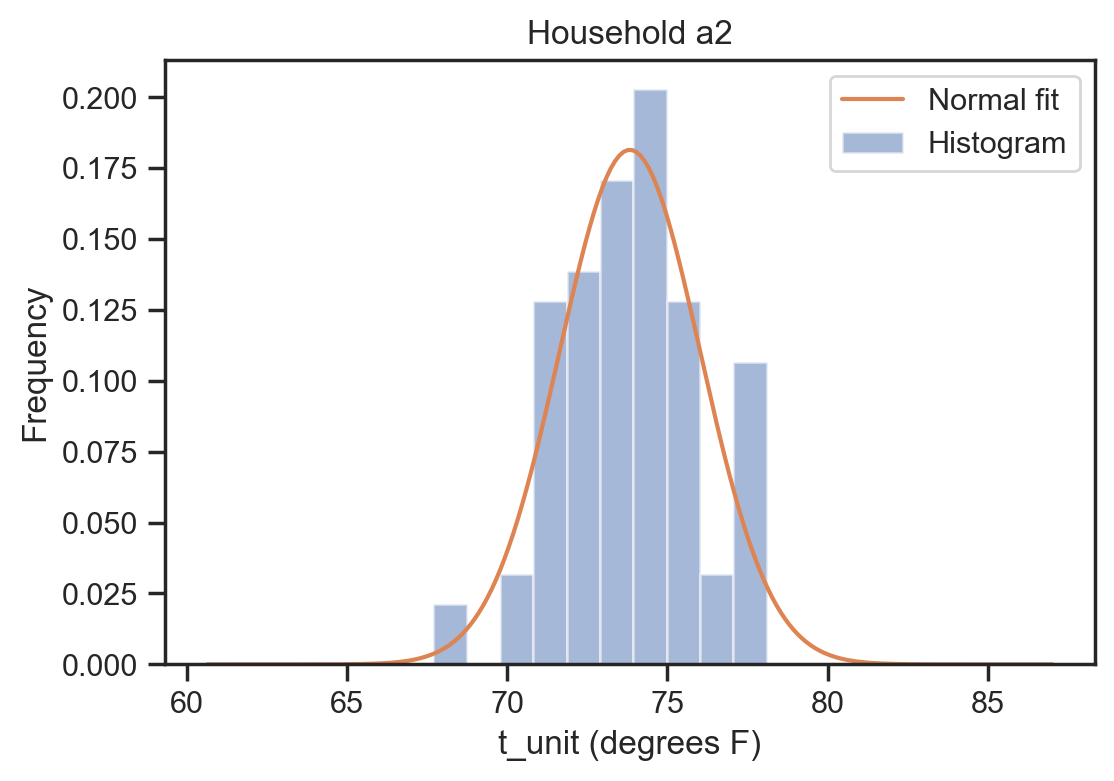

In [36]:
fig, ax = plt.subplots()
ax.hist(t_unit_a2, density=True, alpha=0.5, label='Histogram')
ts = np.linspace(mu_a2 - 6.0 * sigma_a2, mu_a2 + 6.0 * sigma_a2, 200)
ax.plot(ts, T_unit_a2.pdf(ts), label='Normal fit')
ax.set_xlabel('t_unit (degrees F)')
ax.set_ylabel('Frequency')
ax.set_title('Household a2')
plt.legend(loc='best');

Alright, let's compare the two means:

In [38]:
print('mu_a1 = {0:1.2f}'.format(mu))
print('mu_a2 = {0:1.2f}'.format(mu_a2))

mu_a1 = 72.49
mu_a2 = 73.83


Okay, the estimated mean for the second household is greater.
So we can say that the second household prefers warmer temperatures.

(lecture13:fitting-bootstrapping)=
### Using Bootstrapping to quantify our uncertainty about the estimated means (Advanced topic)

```{note}
You can skip this topic. I include it for completeness but it is unlikely that we are going to cover it in class.
```

Recall our discussion of sampling uncertainty in [](lecture07:estimating-probabilities-from-data).
If you had a new dataset, you would get a different estimate for the Normal parameters.
Is the difference between the means of households `a1` and `a2` sufficiently big so that you can ignore this uncertainty when you are comparing them?
You can use the idea of Bootstrapping to quantify the sampling uncertainty in the estimates of the means.
Let's write some code to do exactly that.

In [51]:
def find_t_unit_mean_estimate_of_household(household, N, df):
    """
    Estimates the mean of t_unit by randomly picking N rows
    from the data relevant to the household.
    
    Arguments:
    household     -     The household name.
    N             -     The number of rows to pick at random.
    df            -     The data frame containing the data.
    
    Returns: The number of rows with A True divided by N.
    """
    household_df = df[df['household'] == household]
    rows = np.random.randint(0, household_df.shape[0], size=N)
    household_df_exp = household_df.iloc[rows]
    return household_df_exp['t_unit'].mean()

Remember that the idea of Bootstrapping is that you replicate the experiment as many times as you want.
Here it is 10 times:

In [52]:
for i in range(10):
    mu_a1 = find_t_unit_mean_estimate_of_household('a1', 50, df)
    print('mu_a1 sample = {0:1.2f}'.format(mu_a1))

mu_a1 sample = 72.72
mu_a1 sample = 72.21
mu_a1 sample = 72.08
mu_a1 sample = 72.59
mu_a1 sample = 72.74
mu_a1 sample = 72.68
mu_a1 sample = 72.94
mu_a1 sample = 72.37
mu_a1 sample = 72.70
mu_a1 sample = 72.54


In [53]:
for i in range(10):
    mu_a2 = find_t_unit_mean_estimate_of_household('a2', 50, df)
    print('mu_a2 sample = {0:1.2f}'.format(mu_a2))

mu_a2 sample = 73.18
mu_a2 sample = 73.64
mu_a2 sample = 74.14
mu_a2 sample = 73.84
mu_a2 sample = 74.48
mu_a2 sample = 74.22
mu_a2 sample = 74.07
mu_a2 sample = 74.22
mu_a2 sample = 73.47
mu_a2 sample = 73.82


Now, I'm going to take 1000 sample estimates for each mean and I am going to compare their histograms.

In [54]:
mu_a1s = []
mu_a2s = []
for i in range(1000):
    mu_a1s.append(find_t_unit_mean_estimate_of_household('a1', 50, df))
    mu_a2s.append(find_t_unit_mean_estimate_of_household('a2', 50, df))

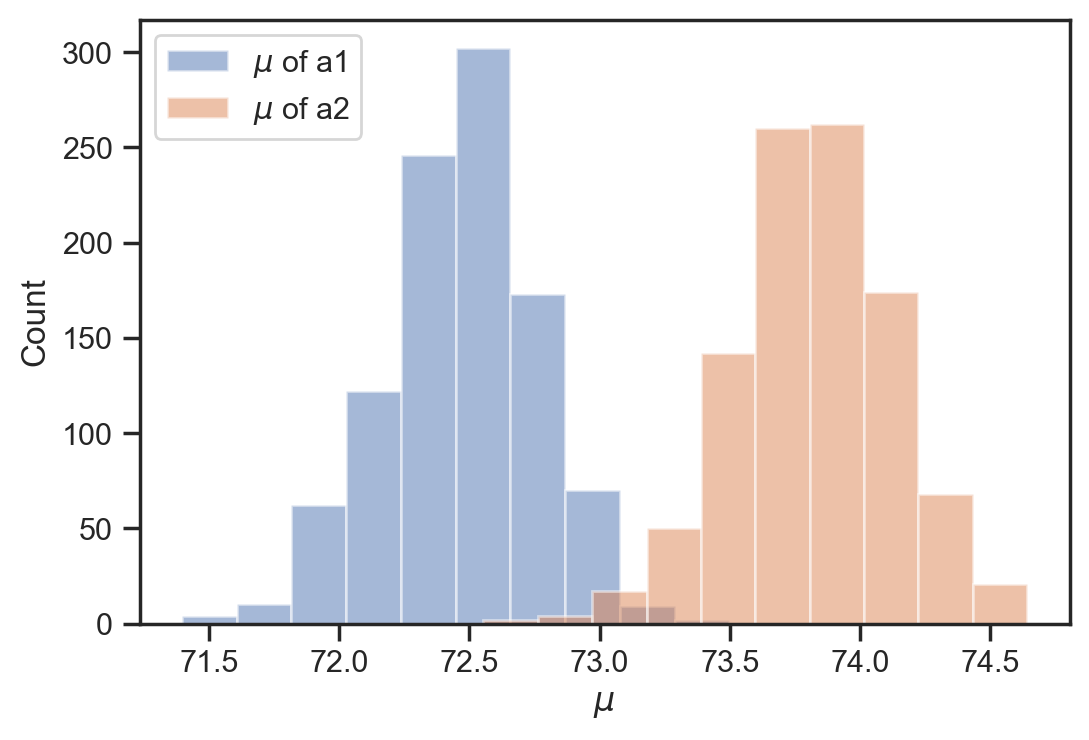

In [55]:
fig, ax = plt.subplots()
ax.hist(mu_a1s, alpha=0.5, label='$\mu$ of a1')
ax.hist(mu_a2s, alpha=0.5, label='$\mu$ of a2')
ax.set_xlabel('$\mu$')
ax.set_ylabel('Count')
plt.legend(loc='best');

And from this we can clearly see that indeed the mean for `a2` is greater than the mean of `a1` with very high-probability.
So, yes `a2` prefers warmer temperatures than `a1`.

## Questions

+ Repeat the analysis above for two other units of your choice.